# Sound celerity maps in the Gulf Stream area



In [1]:
# import libraries

%matplotlib inline
from glob import glob
from netCDF4 import Dataset
#import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gsw

import utils

# load grid info
grd = utils.grid()

# output files
ofiles = sorted(glob(grd._datadir+'*avg*.nc'))
ofile = ofiles[0]

# load temperature
T = Dataset(ofile)['temp']
print T

#[0,:,:,grd.Lp/2]
#zr = 

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
dim lon_rho: 1602  2002
lon_rho min= -7.212308e+01, max=-5.827296e+01
lat_rho min= 3.412333e+01, max=4.373431e+01
h min= 2.000000e+01, max=5.543070e+03
vertical grid parameters found in /home/datawork-lops-osi/jgula/NESED/nesed_avg.00240.nc
<type 'netCDF4._netCDF4.Variable'>
float32 temp(time, s_rho, eta_rho, xi_rho)
    long_name: averaged potential temperature
    units: Celsius
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (20, 50, 1602, 2002)
filling off



---

## Horizontal map


Text(0.5,1,u'surface temperature [degC]')

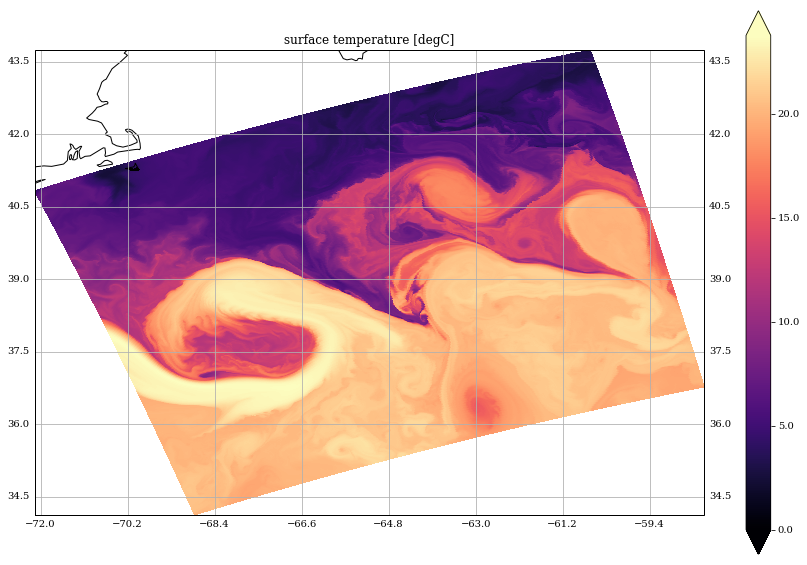

In [2]:
fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(grd.hextent, ccrs.PlateCarree())
gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.xlabels_top = False
ax.coastlines(resolution='50m')
#
it = 0
iz = -1
ilon = grd.Lp/2  # used for vertical slices
toplt = T[it,iz,:,:]
# should probably mask T
cmap = plt.get_cmap('magma')
im = ax.pcolormesh(grd.lon_rho,grd.lat_rho,toplt,
                   vmin=toplt.min(),vmax=toplt.max(), 
                   cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_title('surface temperature [degC]')

#plt.savefig('figs/T_hmap.png',dpi=300)



---

## Vertical sections


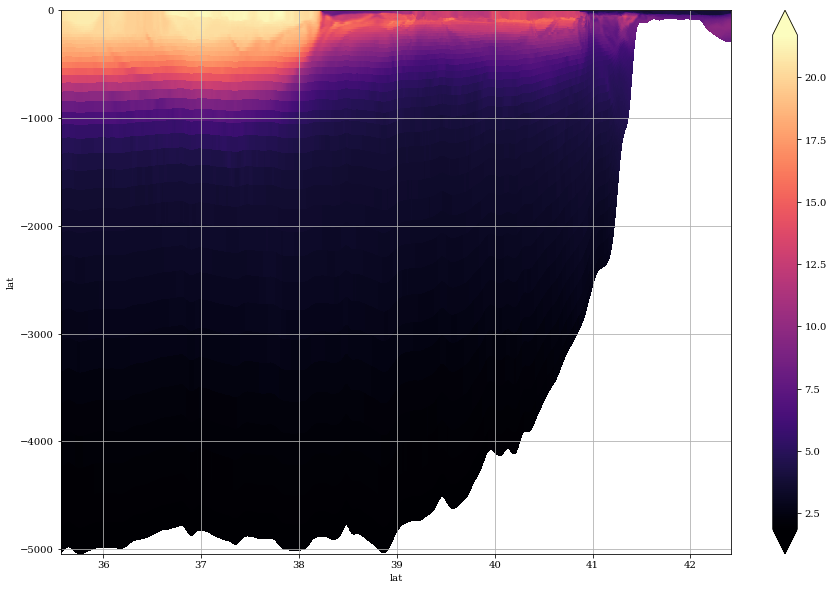

In [3]:
#ilon = grd.Lp/2
lat = grd.lat_rho[None,:,ilon]
h = grd.h[None,:,ilon]
zeta = Dataset(ofile)['zeta'][:][[it],:,ilon]
z0 = (grd.hc * grd.sc_r[:,None] + h * grd.Cs_r[:,None]) / (grd.hc + h)
z = zeta + (zeta + h) * z0


plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = T[it,:,:,ilon]
im = ax.pcolormesh(lat,z,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('lat')
ax.grid(True)

#plt.savefig('figs/T_latz.png',dpi=300)


---

## start looking at celerity now



In [5]:
s = Dataset(ofile)['salt']
p = gsw.p_from_z(T[it,iz,:,:]*0.,grd.lat_rho.mean())
SA = gsw.SA_from_SP(s[it,iz,:,:],p, grd.lon_rho, grd.lat_rho)
CT = gsw.CT_from_pt(SA,T[it,iz,:,:])
c = gsw.sound_speed(s[it,iz,:,:],T[it,iz,:,:],p)
# inputs are: SA (absolute salinity) and CT (conservative temperature)




Text(0.5,1,u'c [m/s]')

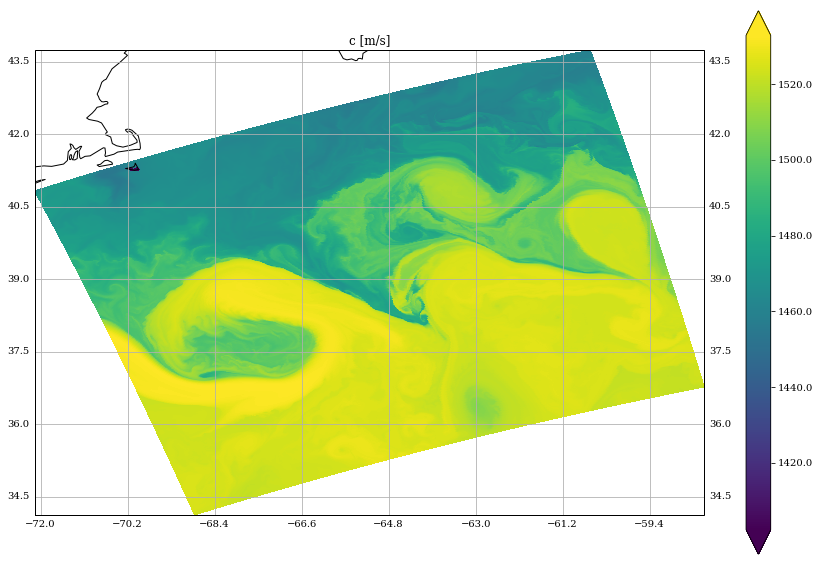

In [6]:
fig=plt.figure(figsize=(15,10))
#
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(grd.hextent, ccrs.PlateCarree())
gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.xlabels_top = False
ax.coastlines(resolution='50m')
#
it = 0
iz = -1
ilon = grd.Lp/2  # used for vertical slices
toplt = c
# should probably mask T
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(grd.lon_rho,grd.lat_rho,toplt,
                   vmin=toplt.min(),vmax=toplt.max(), 
                   cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_title('sound speed [m/s]')

#plt.savefig('figs/c_hmap.png',dpi=300)


---

---

---